<a href="https://colab.research.google.com/github/salopalacios/Mis-Proyectos/blob/main/Implementacion_de_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Lectura y visualización del conjunto de datos
import pandas as pd
import numpy as np
df = pd.read_csv("df_final_limpio_sin_fila_452.csv", sep=",", header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        452 non-null    object 
 1   Tipo_Inmueble              452 non-null    object 
 2   Precio_Inmueble            452 non-null    float64
 3   Area_Construida_m2         452 non-null    float64
 4   Area_Privada_m2            452 non-null    float64
 5   Estrato                    452 non-null    int64  
 6   Habitaciones               452 non-null    int64  
 7   Baños                      452 non-null    int64  
 8   Parqueaderos               452 non-null    int64  
 9   Precio_Administracion      452 non-null    float64
 10  Antiguedad_Años            452 non-null    int64  
 11  Estado                     452 non-null    object 
 12  Piso                       452 non-null    int64  
 13  Caracteristicas_Inmuebles  452 non-null    object 

In [ ]:
#Preparación del conjunto de datos para implementar los modelos:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# ---------------------------
# 1️⃣ Copiar DataFrame
# ---------------------------
df_modelo = df.copy()

# ---------------------------
# 2️⃣ Transformación variable objetivo
# ---------------------------
df_modelo["Precio_Log"] = np.log1p(df_modelo["Precio_Inmueble"])

# ---------------------------
# 3️⃣ Selección de variables
# ---------------------------
features = [
    "Tipo_Inmueble",
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Estado",
    "Piso"
]

X = df_modelo[features]
y = df_modelo["Precio_Log"]

# ---------------------------
# 4️⃣ One-hot encoding
# ---------------------------
X = pd.get_dummies(X, columns=["Tipo_Inmueble", "Estado"], drop_first=True)

# ---------------------------
# 5️⃣ Separación en entrenamiento y prueba
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# 6️⃣ Escalado robusto de variables numéricas
# ---------------------------
numeric_cols = [
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Piso"
]

scaler = RobustScaler()

# Hacer copias limpias para evitar warnings
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])

# ---------------------------
# ✅ Resumen
# ---------------------------
print("Datos preparados correctamente con RobustScaler")
print(f"Train shape: {X_train_scaled.shape}")
print(f"Test shape: {X_test_scaled.shape}")


Datos preparados correctamente con RobustScaler
Train shape: (361, 11)
Test shape: (91, 11)


In [ ]:
#Implementación del modelo de Regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ==============================
# 2️⃣ Preparación de datos
# ==============================

# Copiar DataFrame
df_modelo = df.copy()

# Transformación logarítmica de la variable objetivo
df_modelo["Precio_Log"] = np.log1p(df_modelo["Precio_Inmueble"])

# Selección de variables predictoras
features = [
    "Tipo_Inmueble",
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Estado",
    "Piso"
]

X = df_modelo[features]
y = df_modelo["Precio_Log"]

# One-hot encoding de variables categóricas
X = pd.get_dummies(X, columns=["Tipo_Inmueble", "Estado"], drop_first=True)

# Separación en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalado robusto de variables numéricas
numeric_cols = [
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Piso"
]

scaler = RobustScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])

# ==============================
# 3️⃣ Entrenamiento Regresión Lineal
# ==============================
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# ==============================
# 4️⃣ Predicciones
# ==============================
y_pred_log = lr_model.predict(X_test_scaled)

# Convertir predicciones y test a escala original
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_log)

# ==============================
# 5️⃣ Cálculo de métricas
# ==============================

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

# MAE
mae = mean_absolute_error(y_test_original, y_pred_original)

# R²
r2 = r2_score(y_test_original, y_pred_original)

# MAPE
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

# SMAPE
smape = 100 * np.mean(2 * np.abs(y_pred_original - y_test_original) /
                       (np.abs(y_test_original) + np.abs(y_pred_original)))

# ==============================
# 6️⃣ Mostrar resultados
# ==============================
print("=== Métricas Regresión Lineal (escala original de precios) ===")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"SMAPE: {smape:.2f}%")


=== Métricas Regresión Lineal (escala original de precios) ===
RMSE: 144,538,988.95
MAE: 69,566,681.75
R²: 0.8068
MAPE: 18.82%
SMAPE: 18.38%


In [ ]:
#Implementación del modelo Randm Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ==============================
# 2️⃣ Preparación de datos
# ==============================

# Copiar DataFrame
df_modelo = df.copy()

# Transformación logarítmica de la variable objetivo
df_modelo["Precio_Log"] = np.log1p(df_modelo["Precio_Inmueble"])

# Selección de variables predictoras
features = [
    "Tipo_Inmueble",
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Estado",
    "Piso"
]

X = df_modelo[features]
y = df_modelo["Precio_Log"]

# One-hot encoding de variables categóricas
X = pd.get_dummies(X, columns=["Tipo_Inmueble", "Estado"], drop_first=True)

# Separación en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalado robusto de variables numéricas
numeric_cols = [
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Piso"
]

scaler = RobustScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])

# ==============================
# 3️⃣ Entrenamiento Random Forest
# ==============================
rf_model = RandomForestRegressor(
    n_estimators=500,    # número de árboles
    max_depth=None,      # profundidad ilimitada
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# ==============================
# 4️⃣ Predicciones
# ==============================
y_pred_log = rf_model.predict(X_test_scaled)

# Convertir predicciones y test a escala original
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_log)

# ==============================
# 5️⃣ Cálculo de métricas
# ==============================

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

# MAE
mae = mean_absolute_error(y_test_original, y_pred_original)

# R²
r2 = r2_score(y_test_original, y_pred_original)

# MAPE
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

# SMAPE
smape = 100 * np.mean(2 * np.abs(y_pred_original - y_test_original) /
                       (np.abs(y_test_original) + np.abs(y_pred_original)))

# ==============================
# 6️⃣ Mostrar resultados
# ==============================
print("=== Métricas Random Forest (escala original de precios) ===")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"SMAPE: {smape:.2f}%")


=== Métricas Random Forest (escala original de precios) ===
RMSE: 106,801,416.81
MAE: 55,051,753.06
R²: 0.8945
MAPE: 16.13%
SMAPE: 15.45%


In [ ]:
#Implementación del modelo xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ==============================
# 2️⃣ Preparación de datos
# ==============================

# Copiar DataFrame
df_modelo = df.copy()

# Transformación logarítmica de la variable objetivo
df_modelo["Precio_Log"] = np.log1p(df_modelo["Precio_Inmueble"])

# Selección de variables predictoras
features = [
    "Tipo_Inmueble",
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Estado",
    "Piso"
]

X = df_modelo[features]
y = df_modelo["Precio_Log"]

# One-hot encoding de variables categóricas
X = pd.get_dummies(X, columns=["Tipo_Inmueble", "Estado"], drop_first=True)

# Separación en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalado robusto de variables numéricas
numeric_cols = [
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Piso"
]

scaler = RobustScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])

# ==============================
# 3️⃣ Entrenamiento XGBoost
# ==============================
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)

xgb_model.fit(X_train_scaled, y_train)

# ==============================
# 4️⃣ Predicciones
# ==============================
y_pred_log = xgb_model.predict(X_test_scaled)

# Convertir predicciones y test a escala original
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_log)

# ==============================
# 5️⃣ Cálculo de métricas
# ==============================

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

# MAE
mae = mean_absolute_error(y_test_original, y_pred_original)

# R²
r2 = r2_score(y_test_original, y_pred_original)

# MAPE
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

# SMAPE
smape = 100 * np.mean(2 * np.abs(y_pred_original - y_test_original) /
                       (np.abs(y_test_original) + np.abs(y_pred_original)))

# ==============================
# 6️⃣ Mostrar resultados
# ==============================
print("=== Métricas XGBoost (escala original de precios) ===")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"SMAPE: {smape:.2f}%")


=== Métricas XGBoost (escala original de precios) ===
RMSE: 91,680,491.42
MAE: 53,169,384.11
R²: 0.9223
MAPE: 17.08%
SMAPE: 15.61%


In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [ ]:
#Implementación del modelo CatBooost
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ==============================
# 2️⃣ Preparación de datos
# ==============================

# Copiar DataFrame
df_modelo = df.copy()

# Transformación logarítmica de la variable objetivo
df_modelo["Precio_Log"] = np.log1p(df_modelo["Precio_Inmueble"])

# Selección de variables predictoras
features = [
    "Tipo_Inmueble",
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Estado",
    "Piso"
]

X = df_modelo[features]
y = df_modelo["Precio_Log"]

# Identificar columnas categóricas
cat_features = ["Tipo_Inmueble", "Estado"]

# Separación en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalado robusto de variables numéricas
numeric_cols = [
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Piso"
]

scaler = RobustScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])

# ==============================
# 3️⃣ Entrenamiento CatBoost
# ==============================
cb_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    random_state=42,
    loss_function='RMSE',
    verbose=0
)

# Entrenar usando las columnas categóricas
cb_model.fit(X_train_scaled, y_train, cat_features=cat_features)

# ==============================
# 4️⃣ Predicciones
# ==============================
y_pred_log = cb_model.predict(X_test_scaled)

# Convertir predicciones y test a escala original
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_log)

# ==============================
# 5️⃣ Cálculo de métricas
# ==============================

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

# MAE
mae = mean_absolute_error(y_test_original, y_pred_original)

# R²
r2 = r2_score(y_test_original, y_pred_original)

# MAPE
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

# SMAPE
smape = 100 * np.mean(2 * np.abs(y_pred_original - y_test_original) /
                       (np.abs(y_test_original) + np.abs(y_pred_original)))

# ==============================
# 6️⃣ Mostrar resultados
# ==============================
print("=== Métricas CatBoost (escala original de precios) ===")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"SMAPE: {smape:.2f}%")


=== Métricas CatBoost (escala original de precios) ===
RMSE: 95,575,716.02
MAE: 48,386,039.39
R²: 0.9155
MAPE: 14.89%
SMAPE: 14.36%


In [ ]:
#Hyperparametrización del modelo CatBoost
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import RobustScaler
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# ==============================
# 2️⃣ Preparación de datos
# ==============================
df_modelo = df.copy()

# Variable objetivo logarítmica
df_modelo["Precio_Log"] = np.log1p(df_modelo["Precio_Inmueble"])

# Variables predictoras
features = [
    "Tipo_Inmueble",
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Estado",
    "Piso"
]

X = df_modelo[features]
y = df_modelo["Precio_Log"]

# Identificar columnas categóricas
cat_features = ["Tipo_Inmueble", "Estado"]

# Separación en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalado robusto de variables numéricas
numeric_cols = [
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Piso"
]

scaler = RobustScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])

# ==============================
# 3️⃣ Definir modelo CatBoost
# ==============================
cb = CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='RMSE',
    random_state=42,
    verbose=0
)

# ==============================
# 4️⃣ Definir espacio de búsqueda de hiperparámetros
# ==============================
param_dist = {
    'iterations': [500, 1000, 1500],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0, 0.5, 1, 2],
    'border_count': [32, 64, 128, 254]
}

# ==============================
# 5️⃣ Definir métrica personalizada RMSE
# ==============================
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# ==============================
# 6️⃣ Configurar RandomizedSearchCV
# ==============================
cv = KFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=cb,
    param_distributions=param_dist,
    n_iter=30,                # número de combinaciones a probar
    scoring=rmse_scorer,
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# ==============================
# 7️⃣ Entrenar búsqueda de hiperparámetros
# ==============================
random_search.fit(X_train_scaled, y_train, cat_features=cat_features)

# ==============================
# 8️⃣ Mejor modelo y métricas
# ==============================
best_cb = random_search.best_estimator_
print("Mejores hiperparámetros:", random_search.best_params_)

# Predicciones en test
y_pred_log = best_cb.predict(X_test_scaled)
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_log)

# Métricas finales
rmse_final = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae_final = mean_absolute_error(y_test_original, y_pred_original)
r2_final = r2_score(y_test_original, y_pred_original)
mape_final = np.mean(np.abs((y_test_original - y_pred_original)/y_test_original))*100
smape_final = 100*np.mean(2*np.abs(y_pred_original - y_test_original)/(np.abs(y_test_original)+np.abs(y_pred_original)))

print("=== Métricas CatBoost Optimizado (test) ===")
print(f"RMSE: {rmse_final:,.2f}")
print(f"MAE: {mae_final:,.2f}")
print(f"R²: {r2_final:.4f}")
print(f"MAPE: {mape_final:.2f}%")
print(f"SMAPE: {smape_final:.2f}%")


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Mejores hiperparámetros: {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 1500, 'depth': 6, 'border_count': 128, 'bagging_temperature': 0}
=== Métricas CatBoost Optimizado (test) ===
RMSE: 114,028,418.44
MAE: 54,723,701.52
R²: 0.8798
MAPE: 15.52%
SMAPE: 15.10%


In [ ]:
# Hyperparametrización del modelo xgboost
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import RobustScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

# ==============================
# 2️⃣ Preparación de datos
# ==============================
df_modelo = df.copy()

# Variable objetivo logarítmica
df_modelo["Precio_Log"] = np.log1p(df_modelo["Precio_Inmueble"])

# Variables predictoras
features = [
    "Tipo_Inmueble",
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Estado",
    "Piso"
]

X = df_modelo[features]
y = df_modelo["Precio_Log"]

# One-hot encoding de variables categóricas
X = pd.get_dummies(X, columns=["Tipo_Inmueble", "Estado"], drop_first=True)

# Separación en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalado robusto de variables numéricas
numeric_cols = [
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Piso"
]

scaler = RobustScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])

# ==============================
# 3️⃣ Definir modelo XGBoost
# ==============================
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

# ==============================
# 4️⃣ Definir espacio de búsqueda de hiperparámetros
# ==============================
param_dist = {
    'n_estimators': [200, 500, 800, 1000],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 1.5, 2, 3]
}

# ==============================
# 5️⃣ Definir métrica personalizada RMSE
# ==============================
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# ==============================
# 6️⃣ Configurar RandomizedSearchCV
# ==============================
cv = KFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,           # número de combinaciones a probar
    scoring=rmse_scorer,
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# ==============================
# 7️⃣ Entrenar búsqueda de hiperparámetros
# ==============================
random_search.fit(X_train_scaled, y_train)

# ==============================
# 8️⃣ Mejor modelo y métricas
# ==============================
best_xgb = random_search.best_estimator_
print("Mejores hiperparámetros:", random_search.best_params_)

# Predicciones en test
y_pred_log = best_xgb.predict(X_test_scaled)
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_log)

# Métricas finales
rmse_final = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae_final = mean_absolute_error(y_test_original, y_pred_original)
r2_final = r2_score(y_test_original, y_pred_original)
mape_final = np.mean(np.abs((y_test_original - y_pred_original)/y_test_original))*100
smape_final = 100*np.mean(2*np.abs(y_pred_original - y_test_original)/(np.abs(y_test_original)+np.abs(y_pred_original)))

print("=== Métricas XGBoost Optimizado (test) ===")
print(f"RMSE: {rmse_final:,.2f}")
print(f"MAE: {mae_final:,.2f}")
print(f"R²: {r2_final:.4f}")
print(f"MAPE: {mape_final:.2f}%")
print(f"SMAPE: {smape_final:.2f}%")


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Mejores hiperparámetros: {'subsample': 1, 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.9}
=== Métricas XGBoost Optimizado (test) ===
RMSE: 136,321,894.49
MAE: 66,104,528.20
R²: 0.8282
MAPE: 17.97%
SMAPE: 16.56%


In [ ]:
#Validación cruzada del modelo catBoost
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ==============================
# 2️⃣ Preparación de datos
# ==============================
df_modelo = df.copy()
df_modelo["Precio_Log"] = np.log1p(df_modelo["Precio_Inmueble"])

features = [
    "Tipo_Inmueble",
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Estado",
    "Piso"
]

X = df_modelo[features]
y = df_modelo["Precio_Log"]

# Columnas categóricas
cat_features = ["Tipo_Inmueble", "Estado"]

# Escalado de variables numéricas
numeric_cols = [
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Piso"
]

scaler = RobustScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X_scaled[numeric_cols])

# ==============================
# 3️⃣ Configurar K-Fold CV
# ==============================
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# CatBoost hiperparametrizado (ejemplo de tus mejores parámetros)
catboost_params = {
    "iterations": 1500,
    "learning_rate": 0.03,
    "depth": 4,
    "l2_leaf_reg": 3,
    "border_count": 64,
    "bagging_temperature": 0.5,
    "loss_function": "RMSE",
    "verbose": 0,
    "random_state": 42
}

# ==============================
# 4️⃣ Inicializar listas para métricas
# ==============================
rmse_list = []
mae_list = []
r2_list = []
mape_list = []
smape_list = []

# ==============================
# 5️⃣ Loop de CV
# ==============================
for train_idx, val_idx in kf.split(X_scaled):
    X_train, X_val = X_scaled.iloc[train_idx], X_scaled.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = CatBoostRegressor(**catboost_params)
    model.fit(X_train, y_train, cat_features=cat_features)

    y_pred_log = model.predict(X_val)
    y_val_original = np.expm1(y_val)
    y_pred_original = np.expm1(y_pred_log)

    # Métricas
    rmse_list.append(np.sqrt(mean_squared_error(y_val_original, y_pred_original)))
    mae_list.append(mean_absolute_error(y_val_original, y_pred_original))
    r2_list.append(r2_score(y_val_original, y_pred_original))
    mape_list.append(np.mean(np.abs((y_val_original - y_pred_original)/y_val_original))*100)
    smape_list.append(100*np.mean(2*np.abs(y_pred_original - y_val_original)/(np.abs(y_val_original)+np.abs(y_pred_original))))

# ==============================
# 6️⃣ Mostrar resultados promedio
# ==============================
print("=== Validación Cruzada CatBoost ===")
print(f"RMSE promedio: {np.mean(rmse_list):,.2f} ± {np.std(rmse_list):,.2f}")
print(f"MAE promedio: {np.mean(mae_list):,.2f} ± {np.std(mae_list):,.2f}")
print(f"R² promedio: {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")
print(f"MAPE promedio: {np.mean(mape_list):.2f}% ± {np.std(mape_list):.2f}%")
print(f"SMAPE promedio: {np.mean(smape_list):.2f}% ± {np.std(smape_list):.2f}%")


=== Validación Cruzada CatBoost ===
RMSE promedio: 204,484,577.40 ± 121,231,176.90
MAE promedio: 68,909,369.84 ± 28,300,085.83
R² promedio: 0.8200 ± 0.1181
MAPE promedio: 13.82% ± 2.39%
SMAPE promedio: 13.64% ± 1.99%


In [ ]:
#Validación cruzada del modelo XGBoost
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ==============================
# 2️⃣ Preparación de datos
# ==============================
df_modelo = df.copy()
df_modelo["Precio_Log"] = np.log1p(df_modelo["Precio_Inmueble"])

features = [
    "Tipo_Inmueble",
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Estado",
    "Piso"
]

X = df_modelo[features]
y = df_modelo["Precio_Log"]

# One-hot encoding de variables categóricas
X = pd.get_dummies(X, columns=["Tipo_Inmueble", "Estado"], drop_first=True)

# Escalado de variables numéricas
numeric_cols = [
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Piso"
]

scaler = RobustScaler()
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X_scaled[numeric_cols])

# ==============================
# 3️⃣ Configurar K-Fold CV
# ==============================
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# XGBoost hiperparametrizado (ejemplo de tus mejores parámetros)
xgb_params = {
    "n_estimators": 200,
    "max_depth": 4,
    "learning_rate": 0.03,
    "subsample": 0.8,
    "colsample_bytree": 0.7,
    "reg_alpha": 0,
    "reg_lambda": 1,
    "objective": "reg:squarederror",
    "random_state": 42,
    "verbosity": 0
}

# ==============================
# 4️⃣ Inicializar listas para métricas
# ==============================
rmse_list = []
mae_list = []
r2_list = []
mape_list = []
smape_list = []

# ==============================
# 5️⃣ Loop de CV
# ==============================
for train_idx, val_idx in kf.split(X_scaled):
    X_train, X_val = X_scaled.iloc[train_idx], X_scaled.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = XGBRegressor(**xgb_params)
    model.fit(X_train, y_train)

    y_pred_log = model.predict(X_val)
    y_val_original = np.expm1(y_val)
    y_pred_original = np.expm1(y_pred_log)

    # Métricas
    rmse_list.append(np.sqrt(mean_squared_error(y_val_original, y_pred_original)))
    mae_list.append(mean_absolute_error(y_val_original, y_pred_original))
    r2_list.append(r2_score(y_val_original, y_pred_original))
    mape_list.append(np.mean(np.abs((y_val_original - y_pred_original)/y_val_original))*100)
    smape_list.append(100*np.mean(2*np.abs(y_pred_original - y_val_original)/(np.abs(y_val_original)+np.abs(y_pred_original))))

# ==============================
# 6️⃣ Mostrar resultados promedio
# ==============================
print("=== Validación Cruzada XGBoost ===")
print(f"RMSE promedio: {np.mean(rmse_list):,.2f} ± {np.std(rmse_list):,.2f}")
print(f"MAE promedio: {np.mean(mae_list):,.2f} ± {np.std(mae_list):,.2f}")
print(f"R² promedio: {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")
print(f"MAPE promedio: {np.mean(mape_list):.2f}% ± {np.std(mape_list):.2f}%")
print(f"SMAPE promedio: {np.mean(smape_list):.2f}% ± {np.std(smape_list):.2f}%")


=== Validación Cruzada XGBoost ===
RMSE promedio: 214,898,602.83 ± 123,989,886.00
MAE promedio: 71,653,484.98 ± 26,213,987.53
R² promedio: 0.8048 ± 0.1171
MAPE promedio: 14.26% ± 2.38%
SMAPE promedio: 13.93% ± 1.80%


In [ ]:
#Reentrenamiento del mejor modelo elegido en este caso el modelo CatBoost
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ==============================
# 2️⃣ Preparación de datos
# ==============================
df_modelo = df.copy()
df_modelo["Precio_Log"] = np.log1p(df_modelo["Precio_Inmueble"])

features = [
    "Tipo_Inmueble",
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Estado",
    "Piso"
]

X = df_modelo[features]
y = df_modelo["Precio_Log"]

cat_features = ["Tipo_Inmueble", "Estado"]

# Separación entrenamiento / prueba final
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalado robusto de variables numéricas
numeric_cols = [
    "Area_Construida_m2",
    "Area_Privada_m2",
    "Estrato",
    "Habitaciones",
    "Baños",
    "Parqueaderos",
    "Precio_Administracion",
    "Antiguedad_Años",
    "Piso"
]

scaler = RobustScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])

# ==============================
# 3️⃣ Entrenar modelo CatBoost final
# ==============================
cb_model_final = CatBoostRegressor(
    iterations=1500,
    learning_rate=0.03,
    depth=4,
    l2_leaf_reg=3,
    border_count=64,
    bagging_temperature=0.5,
    random_state=42,
    loss_function='RMSE',
    verbose=0
)

cb_model_final.fit(X_train_scaled, y_train, cat_features=cat_features)

# ==============================
# 4️⃣ Predicciones en set de prueba
# ==============================
y_pred_log = cb_model_final.predict(X_test_scaled)

# Convertir predicciones y test a escala original
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_log)

# ==============================
# 5️⃣ Cálculo de métricas finales
# ==============================
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)
mape = np.mean(np.abs((y_test_original - y_pred_original)/y_test_original))*100
smape = 100*np.mean(2*np.abs(y_pred_original - y_test_original)/(np.abs(y_test_original)+np.abs(y_pred_original)))

print("=== Métricas CatBoost Final (test) ===")
print(f"RMSE: {rmse:,.2f}")
print(f"MAE: {mae:,.2f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"SMAPE: {smape:.2f}%")


=== Métricas CatBoost Final (test) ===
RMSE: 90,058,774.36
MAE: 49,861,569.49
R²: 0.9250
MAPE: 15.39%
SMAPE: 14.86%


=== Primeros 10 residuales ===
     Valor_Real  Prediccion    Residual
299 219,000,000 197,478,750  21,521,250
39  245,000,000 181,966,298  63,033,702
336 225,000,000 204,081,099  20,918,901
332 350,000,000 359,935,840  -9,935,840
153 250,000,000 266,146,857 -16,146,857
196 210,000,000 205,267,539   4,732,461
290 235,000,000 203,852,364  31,147,636
101 190,000,000 195,154,740  -5,154,740
398 180,000,000 203,867,511 -23,867,511
30  179,999,999 193,776,973 -13,776,974


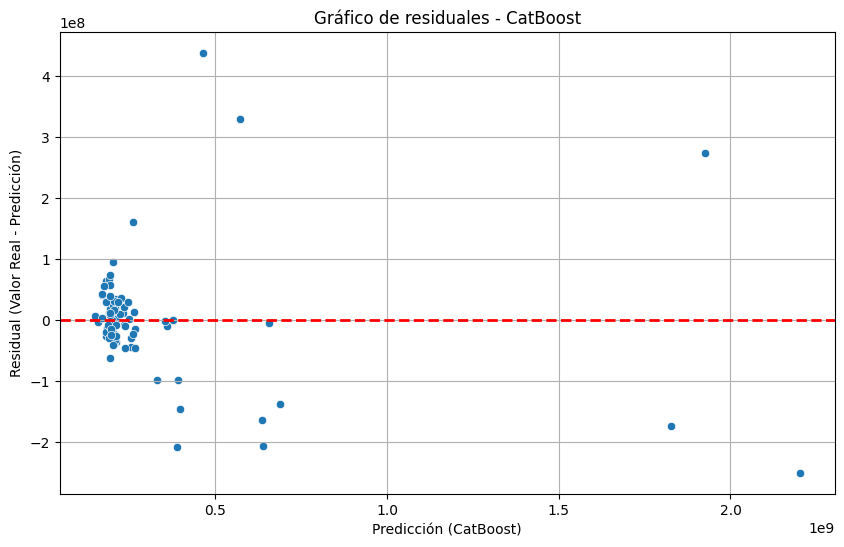

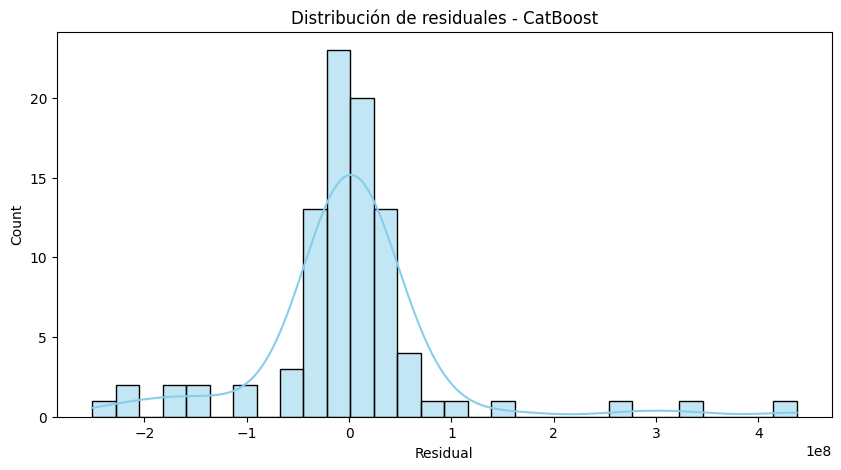

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# 2️⃣ Calcular residuales del modelo CatBoost
# ==============================
# Valores predichos y originales (escala original)
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(cb_model_final.predict(X_test_scaled))

# Residuales
residuals = y_test_original - y_pred_original

# Crear DataFrame para inspección
residuals_df = pd.DataFrame({
    "Valor_Real": y_test_original,
    "Prediccion": y_pred_original,
    "Residual": residuals
})

# ==============================
# Configurar pandas para mostrar números grandes sin notación científica
# ==============================
pd.options.display.float_format = '{:,.0f}'.format

# Mostrar los primeros 10 valores
print("=== Primeros 10 residuales ===")
print(residuals_df.head(10))

# ==============================
# 3️⃣ Gráfico de residuales
# ==============================
plt.figure(figsize=(10,6))
sns.scatterplot(x="Prediccion", y="Residual", data=residuals_df)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicción (CatBoost)")
plt.ylabel("Residual (Valor Real - Predicción)")
plt.title("Gráfico de residuales - CatBoost")
plt.grid(True)
plt.show()

# ==============================
# 4️⃣ Histograma de residuales (opcional)
# ==============================
plt.figure(figsize=(10,5))
sns.histplot(residuals_df["Residual"], bins=30, kde=True, color="skyblue")
plt.xlabel("Residual")
plt.title("Distribución de residuales - CatBoost")
plt.show()

# ==============================
# Restaurar formato original si se desea
# ==============================
# pd.reset_option('display.float_format')


=== Importancia de features en % ===
Baños = 33.48%
Area_Construida_m2 = 18.26%
Parqueaderos = 11.24%
Estrato = 9.73%
Precio_Administracion = 7.90%
Area_Privada_m2 = 7.00%
Habitaciones = 5.58%
Antiguedad_Años = 3.43%
Piso = 1.35%
Estado = 1.04%
Tipo_Inmueble = 0.98%


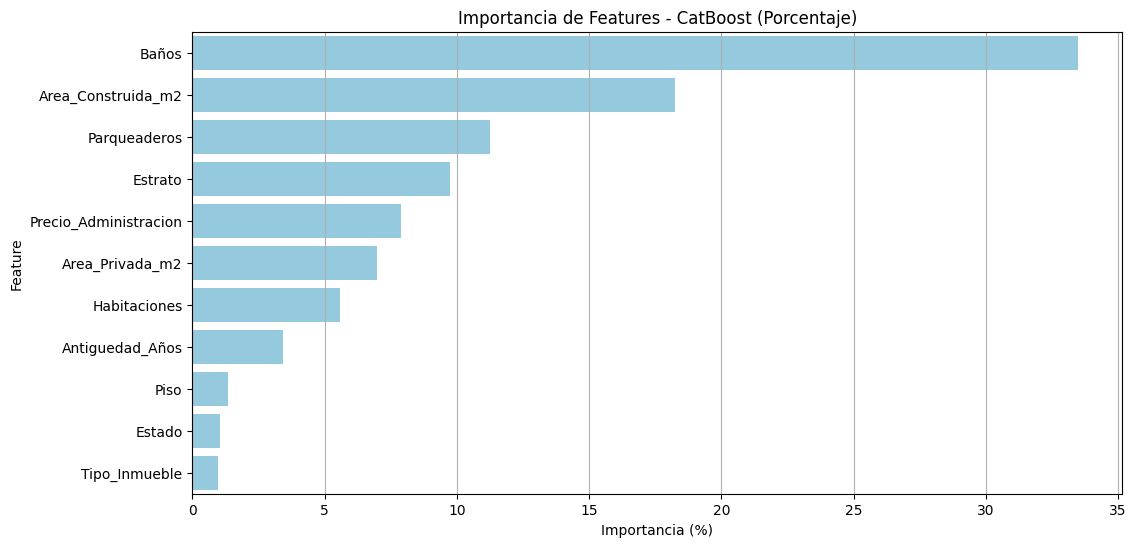

In [ ]:
#Calculo de Feature Importance ( caracteristicas importantes ) para el modelo CatBoost
import seaborn as sns
import numpy as np

# ==============================
# 2️⃣ Obtener importancia de features en porcentaje
# ==============================
feature_importances = cb_model_final.get_feature_importance(type='PredictionValuesChange')
feature_names = X_train_scaled.columns

# Crear DataFrame
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importancia': feature_importances
})

# Convertir a porcentaje
fi_df['Importancia_%'] = 100 * fi_df['Importancia'] / fi_df['Importancia'].sum()

# Ordenar de mayor a menor
fi_df.sort_values(by='Importancia_%', ascending=False, inplace=True)

# Mostrar los valores en porcentaje
print("=== Importancia de features en % ===")
for idx, row in fi_df.iterrows():
    print(f"{row['Feature']} = {row['Importancia_%']:.2f}%")

# ==============================
# 3️⃣ Gráfico de barras de importancia (porcentaje)
# ==============================
plt.figure(figsize=(12,6))
# Seaborn recomienda usar 'x' y 'y' sin palette directo si no hay hue
sns.barplot(x='Importancia_%', y='Feature', data=fi_df, color='skyblue')
plt.title('Importancia de Features - CatBoost (Porcentaje)')
plt.xlabel('Importancia (%)')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()


/tmp/ipython-input-1790897109.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_eval['Rango_Precio'] = df_eval.groupby('Tipo_Inmueble', group_keys=False).apply(asignar_rango)
/tmp/ipython-input-1790897109.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_eval.groupby(['Tipo_Inmueble', 'Rango_Precio'])
/tmp/ipython-input-1790897109.py:54: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the groupin

=== RMSE por Tipo de Inmueble y Rango de Precio ===
Apartamento - Bajo: 49,587,366.26
Apartamento - Medio: 22,534,527.35
Apartamento - Alto: 45,880,757.40
Casa - Bajo: 79,647,473.46
Casa - Medio: 151,632,278.82
Casa - Alto: 305,704,261.83


=== MAE por Tipo de Inmueble y Rango de Precio ===
Apartamento - Bajo: 30,077,154.16
Apartamento - Medio: 18,187,771.13
Apartamento - Alto: 37,548,378.85
Casa - Bajo: 54,172,516.29
Casa - Medio: 135,366,893.30
Casa - Alto: 292,981,323.27


=== MAPE (%) por Tipo de Inmueble y Rango de Precio ===
Apartamento - Bajo: 17.73%
Apartamento - Medio: 8.44%
Apartamento - Alto: 15.03%
Casa - Bajo: 21.41%
Casa - Medio: 29.50%
Casa - Alto: 24.19%


=== SMAPE (%) por Tipo de Inmueble y Rango de Precio ===
Apartamento - Bajo: 14.79%
Apartamento - Medio: 8.61%
Apartamento - Alto: 16.08%
Casa - Bajo: 17.60%
Casa - Medio: 27.80%
Casa - Alto: 28.84%




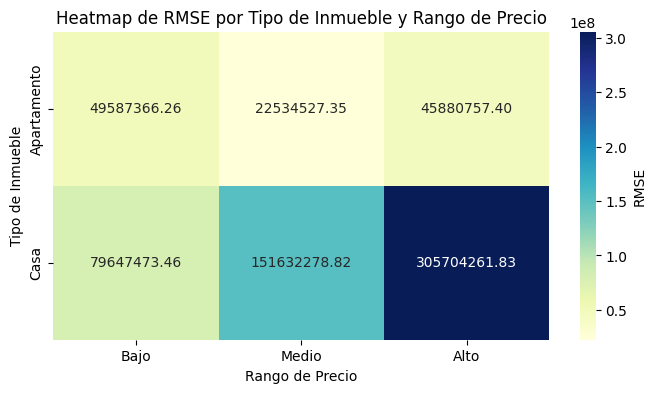

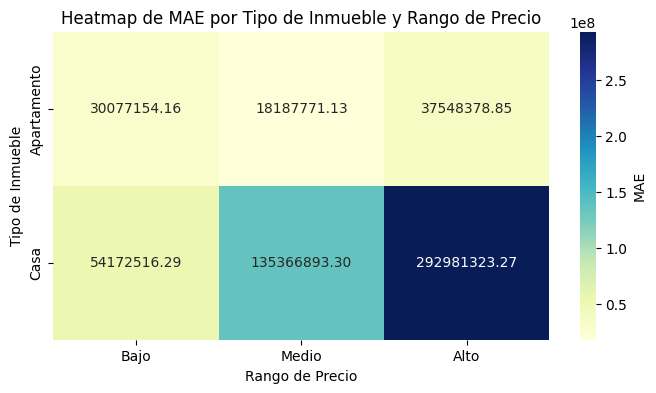

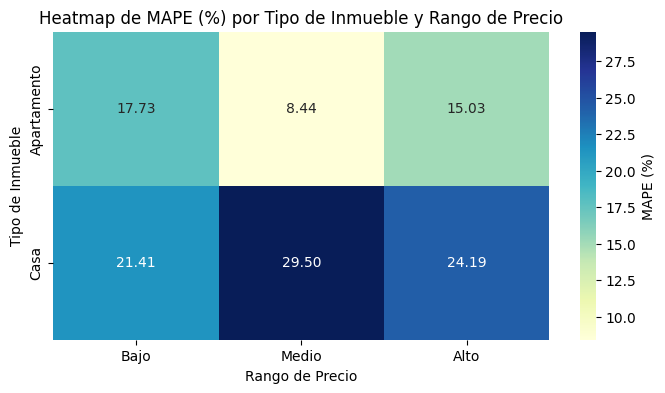

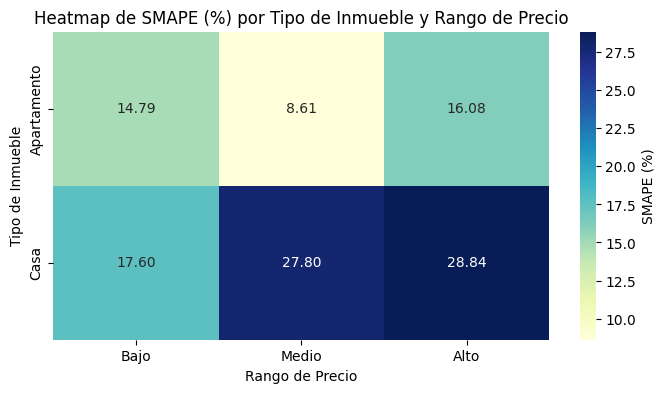

In [ ]:
# Calcular los errores de predicción por tipo de inmueble y rangos de precio
# 1️⃣ Preparar DataFrame de evaluación (test)
# ==============================
df_eval = X_test.copy()
df_eval['Tipo_Inmueble'] = df.loc[X_test.index, 'Tipo_Inmueble']
df_eval['Precio_Real'] = np.expm1(y_test)
df_eval['Predicho'] = np.expm1(cb_model_final.predict(X_test_scaled))

# ==============================
# 2️⃣ Crear rangos de precio por tipo de inmueble
# ==============================
labels = ['Bajo', 'Medio', 'Alto']

def asignar_rango(sub_df):
    percentiles = sub_df['Precio_Real'].quantile([0, 0.33, 0.66, 1.0]).values
    percentiles = np.unique(percentiles)  # asegurar bins únicos
    if len(percentiles) == 1:  # todos iguales
        return pd.Series(['Medio']*len(sub_df), index=sub_df.index)
    else:
        return pd.cut(sub_df['Precio_Real'], bins=percentiles, labels=labels[:len(percentiles)-1], include_lowest=True)

df_eval['Rango_Precio'] = df_eval.groupby('Tipo_Inmueble', group_keys=False).apply(asignar_rango)

# ==============================
# 3️⃣ Funciones de métricas seguras
# ==============================
def safe_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2)) if len(y_true) > 0 else np.nan

def safe_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred)) if len(y_true) > 0 else np.nan

def safe_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100 if len(y_true) > 0 else np.nan

def safe_smape(y_true, y_pred):
    return 100*np.mean(2*np.abs(y_pred - y_true)/(np.abs(y_true)+np.abs(y_pred))) if len(y_true) > 0 else np.nan

# ==============================
# 4️⃣ Calcular métricas por grupo
# ==============================
grouped = df_eval.groupby(['Tipo_Inmueble', 'Rango_Precio'])

metrics = {
    'RMSE': safe_rmse,
    'MAE': safe_mae,
    'MAPE (%)': safe_mape,
    'SMAPE (%)': safe_smape
}

results = {}
for name, func in metrics.items():
    # calcular y rellenar 0 donde no hay datos (opcional: se puede omitir el fillna)
    results[name] = grouped.apply(lambda x: func(x['Precio_Real'], x['Predicho'])).unstack()

# ==============================
# 5️⃣ Mostrar resultados con formato profesional
# ==============================
for name, df_metric in results.items():
    print(f"=== {name} por Tipo de Inmueble y Rango de Precio ===")
    for tipo in df_metric.index:
        for rango in df_metric.columns:
            val = df_metric.loc[tipo, rango]
            if pd.isna(val):
                display_val = "No hay datos"
            elif 'MAPE' in name or 'SMAPE' in name:
                display_val = f"{val:.2f}%"
            else:
                display_val = f"{val:,.2f}"
            print(f"{tipo} - {rango}: {display_val}")
    print("\n")

# ==============================
# 6️⃣ Graficar heatmaps
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns

for name, df_metric in results.items():
    plt.figure(figsize=(8,4))
    sns.heatmap(df_metric, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': name})
    plt.title(f'Heatmap de {name} por Tipo de Inmueble y Rango de Precio')
    plt.ylabel('Tipo de Inmueble')
    plt.xlabel('Rango de Precio')
    plt.show()
